# Nima Aghli 

In [6]:
%matplotlib inline
#from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg
from pylab import *
import pandas as pd
import scipy.misc
import scipy.fftpack as fftim
from scipy.misc.pilutil import Image
from PIL import Image
import cmath
from joblib import Parallel, delayed

In [ ]:
#DFT implementation With 4 nested loops (very slow) as decribed in book  
#used multi processing to run for loops in parallel (Not very good in speeding up )
def calc(m,n,kk,ll):
    s = complex(0)
    s=img_float32[m,n]*exp(-2j*np.pi*((kk*m/M)+(ll*n/N)))
    return s
if __name__ == '__main__':
    image = Image.open("png.png").convert('L')
    img_float32 =np.asarray(image, dtype=float)

    M = np.size(image, 0)#generate height and 
    N = np.size(image, 1)#width to loop over them 
    out = np.zeros((M, N), dtype=complex)
    for k in range(0,M):
        for l in range(0,N):
            s = complex(0)
            s+=Parallel(n_jobs=120)(delayed(calc)(m=x, n=y,kk=k,ll=l) for x in range(0, M) for y in range(0, N)) 
            out[k,l]=s        

    dft_shift = np.fft.fftshift(out)
    magnitude_spectrum = 20*np.log(np.abs(dft_shift))        
    figure()
    plt.imshow(magnitude_spectrum, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
    title('Original Image')
    show()

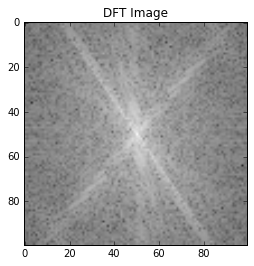

In [2]:
#DFT implementation With 4 nested loops (very slow) as decribed in book  
image = Image.open("Fig0431(d)(blown_ic_crop).tif").convert('L')
img_float32 =np.asarray(image, dtype=float)
M = np.size(image, 0)#generate height and 
N = np.size(image, 1)#width to loop over them 
out = np.zeros((M, N), dtype=complex)
for k in range(0,M):
    for l in range(0,N):
        s = complex(0)
        s1 = complex(0)
        for x in range(0,M):       
            for y in range(0,N):
                s+=img_float32[x,y]*exp(-2j*np.pi*((k*x/M)+(l*y/N)))
        out[k,l]=s

dft_shift = np.fft.fftshift(out)
magnitude_spectrum = 20*np.log(np.abs(dft_shift))        
figure()
plt.imshow(magnitude_spectrum, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('DFT Image')
show()

## Figure 3.4.b

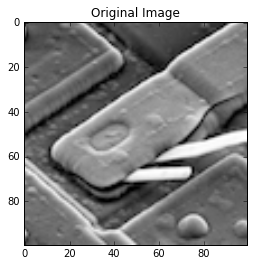

100
100


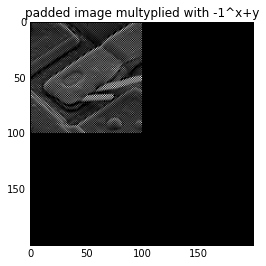

In [58]:
img_p = cv2.imread("Fig0431(d)(blown_ic_crop).tif",0)
#img_p=mpimg.imread('Fig0431(d)(blown_ic_crop).tif')
figure()
plt.imshow(img_p, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('Original Image')
show()

height = np.size(img_p, 0)#generate height and 
width = np.size(img_p, 1)#width to loop over them 
img=np.zeros((height*2,width*2))
c = img.copy()
c[:img_p.shape[0],:img_p.shape[1]] -=  img_p
print (height)
print (width)

d = img.copy()


for x in range(0,width*2):
    for y in range(0,height*2):
               d[x,y]=c[x,y]*pow(-1,x+y)
figure()
plt.imshow(d, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('padded image multyplied with -1^x+y')
show()
            

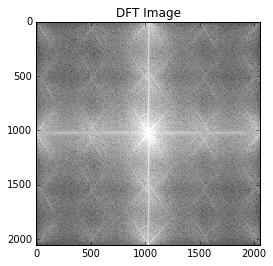

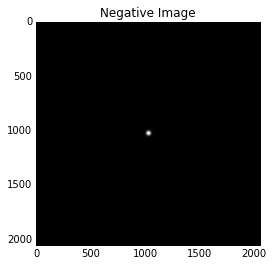

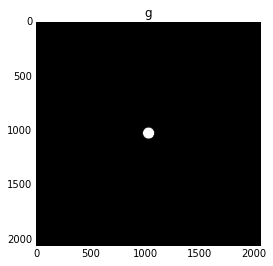

In [138]:
#img_float32 = np.float32(d)
#dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

dft=np.fft.fft2(c)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(np.abs(dft_shift))


figure()
plt.imshow(magnitude_spectrum,cmap = 'gray',vmin = 0, vmax = 255)
title('DFT Image')
show()
f = magnitude_spectrum.copy()
sig=14

for x in range(0,width*2):
    for y in range(0,height*2):
               f[x,y]=(1/2*3.14*pow(sig,2))*exp(-1*(pow(x-width,2)+pow(y-height,2))/(2*pow(sig,2)))


#dst = cv2.GaussianBlur(magnitude_spectrum,(2051,2051),100,100)
figure()
plt.imshow(f, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('Negative Image')
show()

g = magnitude_spectrum.copy()
for x in range(0,width*2):
    for y in range(0,height*2):
        g[x,y] = f[x,y]*magnitude_spectrum[x,y]
        
figure()
plt.imshow(g, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('g')
show()
 



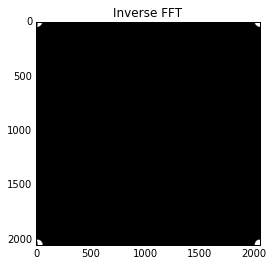

In [170]:
f_ishift = np.fft.ifftshift(g)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
            
for x in range(0,width*2):
    for y in range(0,height*2):
               img_back[x,y]=img_back[x,y]*pow(-1,x+y)
            
figure()
plt.imshow(img_back_1, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1)
title('Inverse FFT')
show()

## Figure 4.41

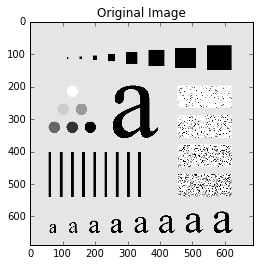

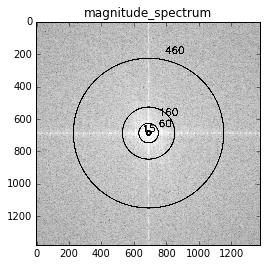

1376
1376


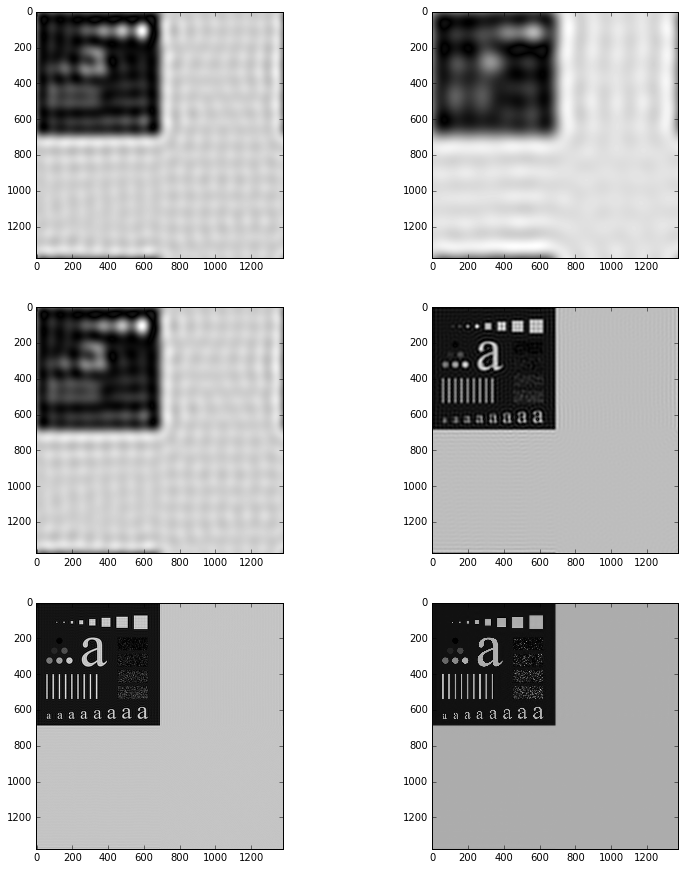

In [22]:
x = np.array([10,15,60,160,460])
img_1 = cv2.imread('Fig0441(a)(characters_test_pattern).tif',0)


figure()
plt.imshow(img_1, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('Original Image')
show()




height = np.size(img_1, 0)#generate height and 
width = np.size(img_1, 1)#width to loop over them 
img=np.zeros((height*2,width*2))
img_2 = img.copy()
img_2[:img_1.shape[0],:img_1.shape[1]] -=  img_1



a = scipy.misc.toimage(img_2).convert('L')
b=scipy.misc.fromimage(a)
c=fftim.fft2(b)
d=fftim.fftshift(c)

magnitude_spectrum = 20*np.log(np.abs(d))
cv2.circle(magnitude_spectrum,(688,688), 10, (0,0,255), 5)
cv2.circle(magnitude_spectrum,(688,688), 15, (0,0,255), 5)
cv2.circle(magnitude_spectrum,(688,688), 60, (0,0,255), 5)
cv2.circle(magnitude_spectrum,(688,688), 160, (0,0,255), 5)
cv2.circle(magnitude_spectrum,(688,688), 460, (0,0,255), 5)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(magnitude_spectrum,'460',(788,200), font, 2,(0,0,255),5,cv2.LINE_AA)
cv2.putText(magnitude_spectrum,'160',(750,550), font, 2,(0,0,255),5,cv2.LINE_AA)
cv2.putText(magnitude_spectrum,'60',(750,650), font, 2,(0,0,255),5,cv2.LINE_AA)
cv2.putText(magnitude_spectrum,'15',(650,680), font, 2,(0,0,255),5,cv2.LINE_AA)


figure()
plt.imshow(magnitude_spectrum, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('magnitude_spectrum')
show()

M = np.size(d, 0)#generate height and 
N = np.size(d, 1)#width to loop over them 
print (M)
print (N)
H=np.ones((M,N))
i_1=np.ones((M,N))
i_2=np.ones((M,N))
i_3=np.ones((M,N))
i_4=np.ones((M,N))
i_5=np.ones((M,N))

res = np.array([i_1,i_2,i_3,i_4,i_5])


center1=M/2
center2=N/2
for k in range (0,5):
    for i in range(0,M):
        for j in range(0,N):
            r1=(i-center1)**2+(j-center2)**2
            r=sqrt(r1)
            if(r>x[k]):
                res[k][i,j]=0.0

for k in range (0,5):                
    H=scipy.misc.toimage(res[k])            
    con=d*H
    e=abs(fftim.ifft2(con))
    f=scipy.misc.toimage(e)
    res[k]=f
    
a = scipy.misc.toimage(res[1])
b=scipy.misc.fromimage(a)
c=fftim.fft2(b)
d=fftim.fftshift(c)


nrows = 3
ncols = 2
fig = plt.figure(figsize=(13, 15))
ax = fig.add_subplot(nrows, ncols, 1)
ax.imshow(a,cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 2)
ax.imshow(res[0],cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 3)
ax.imshow(res[1],cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 4)
ax.imshow(res[2],cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 5)
ax.imshow(res[3],cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 6)
ax.imshow(res[4],cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)

## Figure 4.48

In [1]:
x = np.array([10,15,60,160,460])

a = Image.open('Fig0441(a)(characters_test_pattern).tif').convert('L')
b=scipy.misc.fromimage(a)
c=fftim.fft2(b)
d=fftim.fftshift(c)




M = np.size(d, 0)#generate height and 
N = np.size(d, 1)#width to loop over them 
print (M)
print (N)
H=np.ones((M,N))
i_1=np.ones((M,N))
i_2=np.ones((M,N))
i_3=np.ones((M,N))
i_4=np.ones((M,N))
i_5=np.ones((M,N))

res = np.array([i_1,i_2,i_3,i_4,i_5])


center1=M/2
center2=N/2
d_0=10.0
t1=2*d_0
for k in range (0,5):
    t1=2*x[k]
    for i in range(0,M):
        for j in range(0,N):
            r1=(i-center1)**2+(j-center2)**2
            r=sqrt(r1)
            if(r>x[k]):
                res[k][i,j]=exp(-r**2/t1**2)

for k in range (0,5):                
    H=scipy.misc.toimage(res[k])            
    con=d*H
    e=abs(fftim.ifft2(con))
    f=scipy.misc.toimage(e)
    res[k]=f
    


nrows = 3
ncols = 2
fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(nrows, ncols, 1)
ax.imshow(a,cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)

ax = fig.add_subplot(nrows, ncols, 2)
ax.imshow(res[0],cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 3)
ax.imshow(res[1],cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 4)
ax.imshow(res[2],cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 5)
ax.imshow(res[3],cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 6)
ax.imshow(res[4],cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)

NameError: name 'np' is not defined

## Figure 4.56

688
688


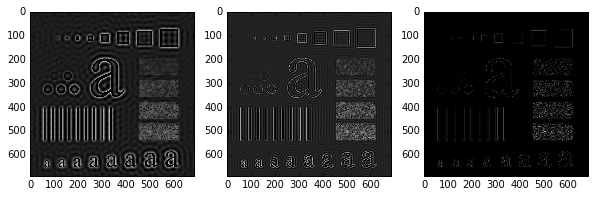

In [127]:




x = np.array([30,60,160])

a = Image.open('Fig0441(a)(characters_test_pattern).tif').convert('L')
b=scipy.misc.fromimage(a)
c=fftim.fft2(b)
d=fftim.fftshift(c)




M = np.size(d, 0)#generate height and 
N = np.size(d, 1)#width to loop over them 
print (M)
print (N)
H=np.ones((M,N))
i_1=np.ones((M,N))
i_2=np.ones((M,N))
i_3=np.ones((M,N))
i_4=np.ones((M,N))
i_5=np.ones((M,N))

res = np.array([i_1,i_2,i_3,i_4,i_5])


center1=M/2
center2=N/2
d_0=10.0
t1=2*d_0
for k in range (0,3):
    t1=2*x[k]
    for i in range(0,M):
        for j in range(0,N):
            r1=(i-center1)**2+(j-center2)**2
            r=sqrt(r1)
            if(0<r<x[k]):
                res[k][i,j]=1-exp(-r**2/t1**2)

for k in range (0,3):                
    H=scipy.misc.toimage(res[k])            
    con=d*H
    e=abs(fftim.ifft2(con))
    f=scipy.misc.toimage(e)
    res[k]=f
    


nrows = 1
ncols = 3
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(nrows, ncols, 1)
ax.imshow(a,cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)

ax = fig.add_subplot(nrows, ncols, 1)
ax.imshow(res[0],cmap = plt.get_cmap('gray'), vmin = 120, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 2)
ax.imshow(res[1],cmap = plt.get_cmap('gray'), vmin = 120, vmax = 255)
ax = fig.add_subplot(nrows, ncols, 3)
ax.imshow(res[2],cmap = plt.get_cmap('gray'), vmin = 120, vmax = 255)


# 4.62 

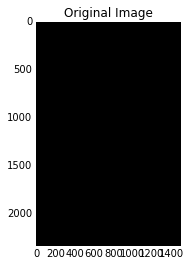

TypeError: Image data can not convert to float

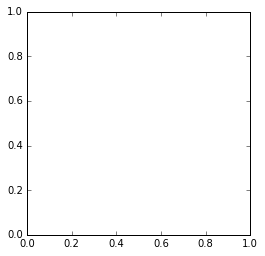

In [25]:
#could not make this example work but padding and creating gaussian filter was correct 
a = Image.open('Fig0462(a)(PET_image).tif').convert('L')
img_p =np.asarray(a, dtype=float)

height = np.size(img_p, 0)#generate height and 
width = np.size(img_p, 1)#width to loop over them 
img=np.zeros((height*2,width*2))
I = img.copy()
I[:img_p.shape[0],:img_p.shape[1]] -=  img_p

figure()
plt.imshow(I, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('Original Image')
show()
I = log(1 + I);
M = 2*np.size(I, 0) + 1;
N = 2*np.size(I, 1) + 1;
X, Y = meshgrid(M, N)
sigma=16
centerX = ceil(N/2);
centerY = ceil(M/2);
#gaussianNumerator = (X - centerX)**2 + (Y - centerY)**2;
#H = exp(-gaussianNumerator/(2*sigma**2));
#H = 1 - H;
H=np.ones((M,N))
for x in range(0,M):
    for y in range(0,N):
               H[x,y]=(1/2*3.14*pow(sigma,2))*exp(-1*(pow(x-np.size(I, 0),2)+pow(y-np.size(I, 1),2))/(2*pow(sigma,2)))



c=fftim.fft2(I)
Iout = fftim.ifft2(c*I);
Ihmf = exp(Iout) - 1;

figure()
plt.imshow(Ihmf, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('Original Image')
show()

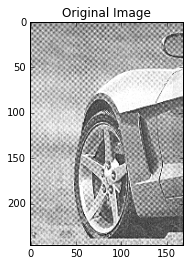

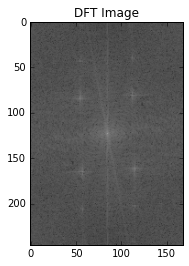

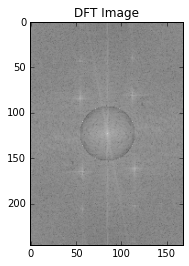

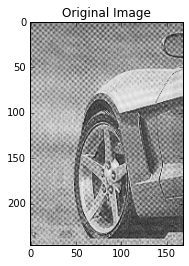

In [57]:
#Figure 4.64
a = Image.open('Fig0464(a)(car_75DPI_Moire).tif').convert('L')
figure()
plt.imshow(a, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('Original Image')
show()
b=scipy.misc.fromimage(a)
c=fftim.fft2(b)
d=fftim.fftshift(c)
magnitude_spectrum = 10*np.log(np.abs(d))


figure()
plt.imshow(magnitude_spectrum,cmap = 'gray',vmin = 0, vmax = 255)
title('DFT Image')
show()



M = np.size(d, 0)#generate height and 
N = np.size(d, 1)#width to loop over them 

res=np.ones((M,N))
center1=M/2
center2=N/2
d_0=30
t1=4
t2=2*t1
for i in range(0,M):
    for j in range(0,N):
        r1=(i-center1)**2+(j-center2)**2
        r=sqrt(r1)
        if(0<r<d_0):
            res[i,j]=1/(1+(r/d_0)**t2)
H=scipy.misc.toimage(res)            
con=d*H
e=abs(fftim.ifft2(con))
f=scipy.misc.toimage(e)
res=f   

magnitude_spectrum = 10*np.log(np.abs(con))


figure()
plt.imshow(magnitude_spectrum,cmap = 'gray',vmin = 0, vmax = 255)
title('DFT Image')
show()


figure()
plt.imshow(res, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
title('Original Image')
show()